[*********************100%***********************]  1 of 1 completed


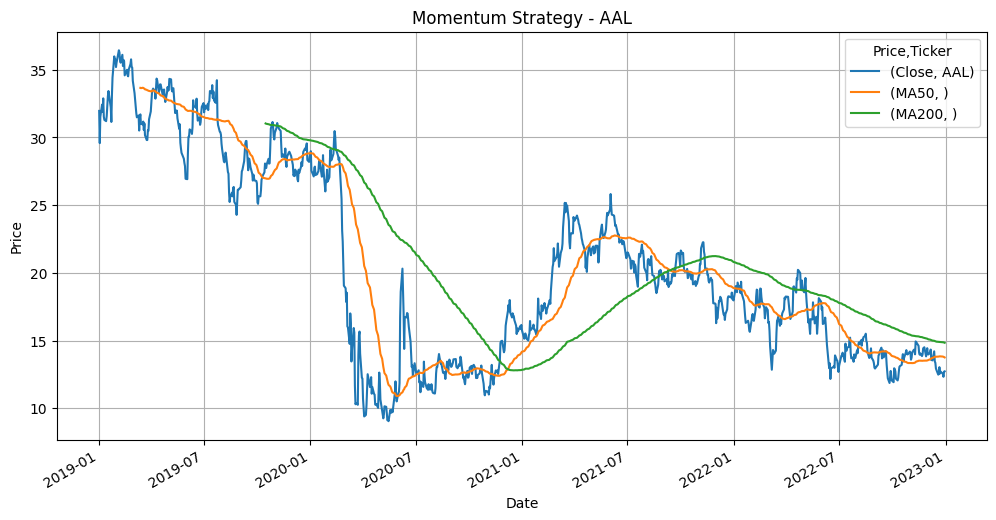

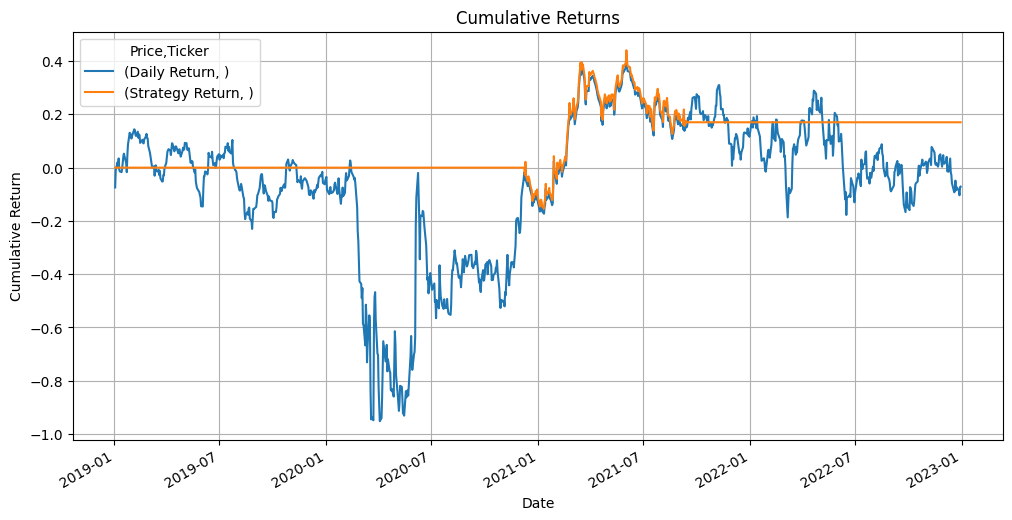

In [2]:
# Momentum Strategy Backtest (50/200 MA Crossover)

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical price data
data = yf.download("AAL", start="2019-01-01", end="2023-01-01")

# Create moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Create buy signal
data['Signal'] = 0
data['Signal'] = np.where(data['MA50'] > data['MA200'], 1, 0)
data['Position'] = data['Signal'].shift(1)

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Daily Return'] * data['Position']

# Plot price with moving averages
data[['Close', 'MA50', 'MA200']].plot(figsize=(12, 6), title='Momentum Strategy - AAL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Plot cumulative returns
data[['Daily Return', 'Strategy Return']].dropna().cumsum().plot(figsize=(12, 6), title='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()
